In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
titanic_df = sns.load_dataset('titanic')

In [6]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
titanic_df.info() # 결측치가 있으면 넣을 수가 없기 때문에 제일 먼저 info를 확인 한다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
categorical_cols = ["sex", "embarked", "class", "who", "adult_male", "deck","embark_town",
       "alive", "alone"]
numerical_cols = ["age","sibsp","parch","fare"]

In [12]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
for col in categorical_cols:
    print(titanic_df.loc[:,col].value_counts())

male      577
female    314
Name: sex, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
no     549
yes    342
Name: alive, dtype: int64
True     537
False    354
Name: alone, dtype: int64


In [14]:
for col in categorical_cols:
    print(col + "카운트::")
    print(titanic_df.loc[:,col].value_counts())
    print()

sex카운트::
male      577
female    314
Name: sex, dtype: int64

embarked카운트::
S    644
C    168
Q     77
Name: embarked, dtype: int64

class카운트::
Third     491
First     216
Second    184
Name: class, dtype: int64

who카운트::
man      537
woman    271
child     83
Name: who, dtype: int64

adult_male카운트::
True     537
False    354
Name: adult_male, dtype: int64

deck카운트::
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

embark_town카운트::
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alive카운트::
no     549
yes    342
Name: alive, dtype: int64

alone카운트::
True     537
False    354
Name: alone, dtype: int64



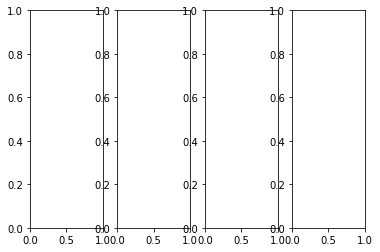

In [30]:
figure, ax_list = plt.subplots(nrows =1, ncols = 4) # plt.subplots를 통해 여러 개의 도화지를 생성함. (nrows × ncols)

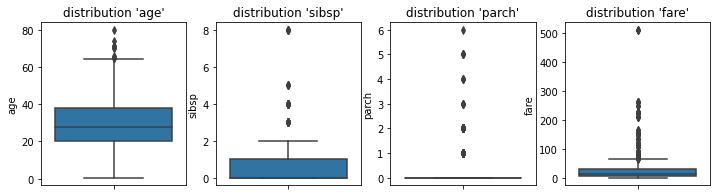

In [44]:
figure, ax_list = plt.subplots(nrows =1, ncols = 4) 
figure.set_size_inches(12,3) # 12*3의 사이즈로 형태를 잡는 것 

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data = titanic_df, y = col, showfliers = True,ax = ax_list[i])
    ax_list[i].set_title(f"distribution '{col}'")

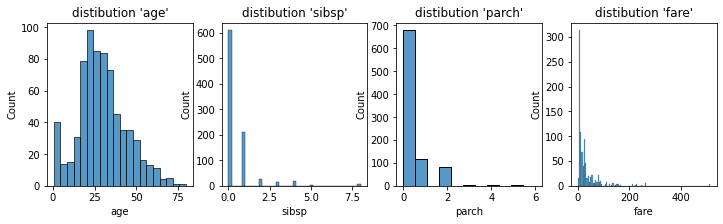

In [42]:
figure, ax_list = plt.subplots(nrows = 1, ncols = 4)
figure.set_size_inches(12,3)

for i in range(4):
    sns.histplot(data =titanic_df.loc[:, numerical_cols[i]], ax = ax_list[i])
    ax_list[i].set_title(f"distibution '{numerical_cols[i]}'")

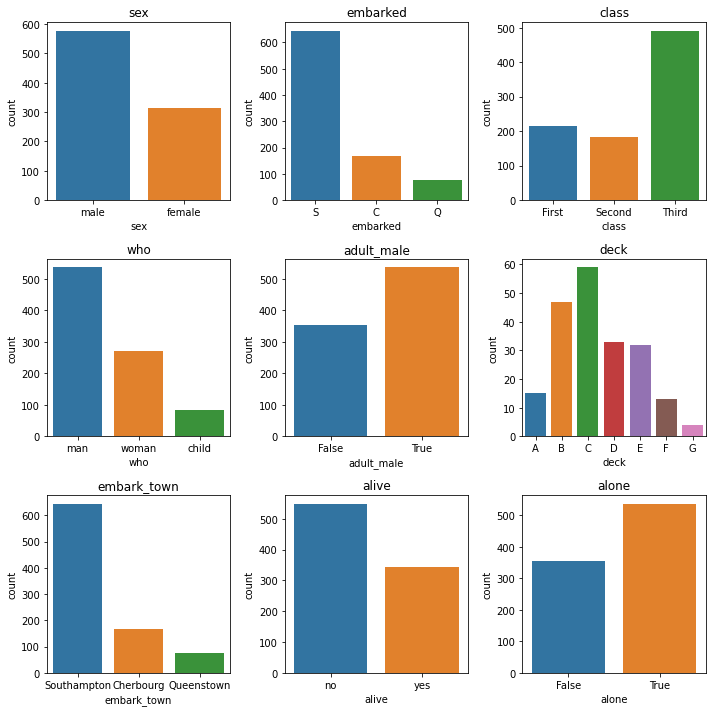

In [47]:
figure, ax_list_list = plt.subplots(nrows =3, ncols =3);
figure.set_size_inches(10,10)
ax_list = ax_list_list.reshape(9)
for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    sns.countplot(data = titanic_df, x = col, ax = ax_list[i])
    ax_list[i].set_title(col)
    
plt.tight_layout()


<AxesSubplot:xlabel='sex', ylabel='count'>

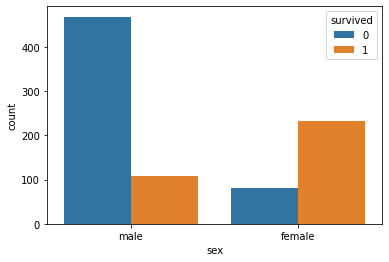

In [50]:
sns.countplot(data = titanic_df, x = 'sex', hue ='survived')

<AxesSubplot:xlabel='pclass', ylabel='count'>

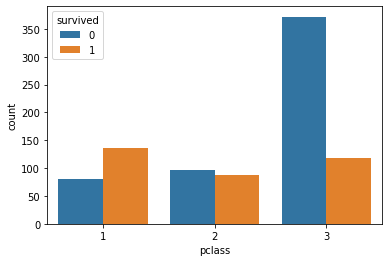

In [51]:
sns.countplot(data = titanic_df, x = 'pclass', hue = 'survived')

(3, 3)
(9,)


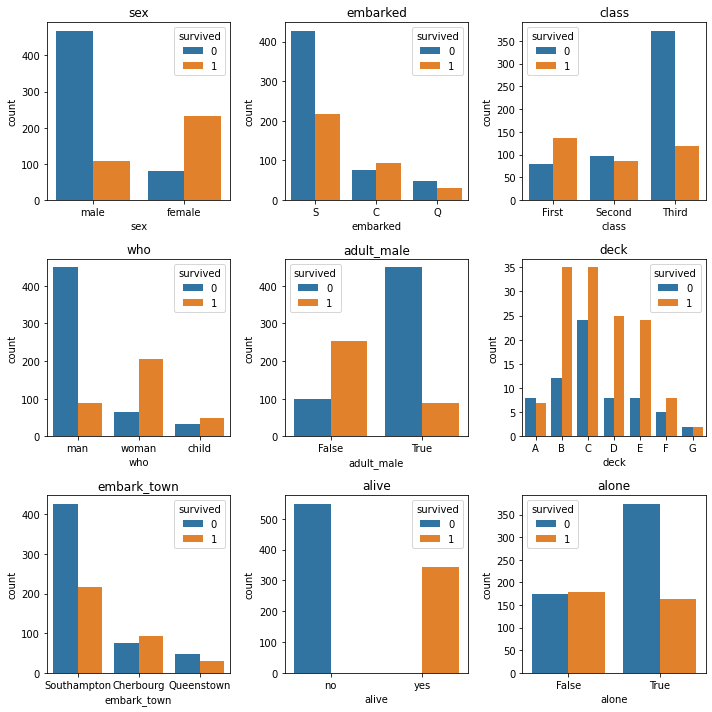

In [53]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)
ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)
for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i], hue='survived')
    ax_list[i].set_title(col)
plt.tight_layout()

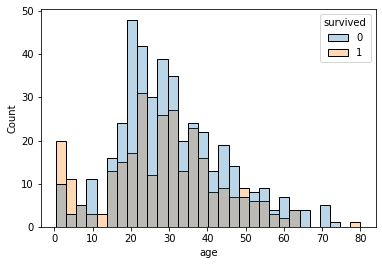

In [54]:
sns.histplot(data=titanic_df, x='age', hue='survived', bins=30, alpha=0.3);

# 회색 부분은 겹쳐진 부분이다. 


<AxesSubplot:xlabel='sex', ylabel='age'>

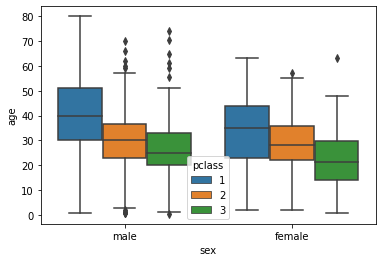

In [56]:
sns.boxplot(data = titanic_df, x = 'sex', y = 'age', hue ='pclass')

In [57]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [59]:
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace= True)
titanic_df['deck'].fillna(titanic_df['deck'].describe()['top'], inplace= True)
titanic_df['embarked'].fillna(titanic_df['embarked'].describe()['top'], inplace= True)
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [62]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [64]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

titanic_df['sex'] = le.fit(titanic_df['sex']).transform(titanic_df['sex'])
titanic_df['adult_male'] = le.fit(titanic_df['adult_male']).transform(titanic_df['adult_male'])
titanic_df['alone'] = le.fit(titanic_df['alone']).transform(titanic_df['alone'])
titanic_df['embarked'] = le.fit(titanic_df['embarked']).transform(titanic_df['embarked'])
titanic_df['deck'] = le.fit(titanic_df['deck']).transform(titanic_df['deck'])
titanic_df['who'] = le.fit(titanic_df['who']).transform(titanic_df['who'])

titanic_df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,Third,1,1,2,Southampton,no,0
1,1,1,0,38.000000,1,0,71.2833,0,First,2,0,2,Cherbourg,yes,0
2,1,3,0,26.000000,0,0,7.9250,2,Third,2,0,2,Southampton,yes,1
3,1,1,0,35.000000,1,0,53.1000,2,First,2,0,2,Southampton,yes,0
4,0,3,1,35.000000,0,0,8.0500,2,Third,1,1,2,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,Second,1,1,2,Southampton,no,1
887,1,1,0,19.000000,0,0,30.0000,2,First,2,0,1,Southampton,yes,1
888,0,3,0,29.699118,1,2,23.4500,2,Third,2,0,2,Southampton,no,0
889,1,1,1,26.000000,0,0,30.0000,0,First,1,1,2,Cherbourg,yes,1


In [65]:
drop_cols = ["class", "embark_town", "alive"]
titanic_df = titanic_df.drop(drop_cols, axis =1)
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22.000000,1,0,7.2500,2,1,1,2,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0,2,0
2,1,3,0,26.000000,0,0,7.9250,2,2,0,2,1
3,1,1,0,35.000000,1,0,53.1000,2,2,0,2,0
4,0,3,1,35.000000,0,0,8.0500,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,2,1
887,1,1,0,19.000000,0,0,30.0000,2,2,0,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,0,2,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1,2,1


In [67]:
X = titanic_df.iloc[:,1:] #(행, 열)
y = titanic_df['survived'] # y값으로 주는 것으로 위에 X에 인덱스 1: 부터 시작하는 것이다. 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=45) 
# random_state ->  raemdom.seed와 동일한 옵션


In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print('예측 정확도: %.2f' %accuracy_score(y_test, y_pred))

예측 정확도: 0.80
